# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

### Keras Upgrade

In [2]:
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.0 MB/s eta 0:00:00


## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [3]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

### Data Loading

In [4]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2
            "Dress",        # index 3
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6
            "Sneaker",      # index 7
            "Bag",          # index 8
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 4762
다음 그림은 Ankle boot 입니다.


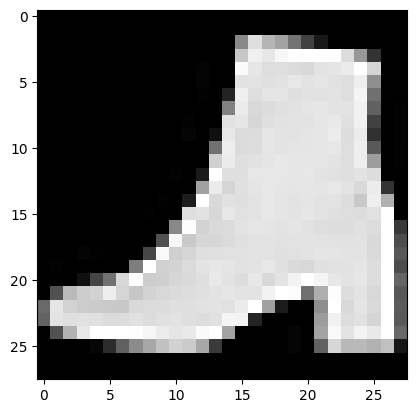

In [7]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='gray')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [8]:
max_n, min_n = train_x.max(), train_x.min()

train_x = (train_x - min_n) / (max_n - min_n)
tetst_x = (test_x - min_n) / (max_n - min_n)

train_x.max(), train_x.min()

(1.0, 0.0)

### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [9]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
train_x = train_x.reshape((-1, 28, 28, 1))
test_x = test_x.reshape((-1, 28, 28, 1))

train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Y : One-Hot Encoding

In [11]:
train_y.shape

(60000,)

In [12]:
from keras.utils import to_categorical

classes_n = len(np.unique(train_y))

train_y = to_categorical(train_y, classes_n)
test_y = to_categorical(test_y, classes_n)

train_x.shape, test_y.shape

((60000, 28, 28, 1), (10000, 10))

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [13]:
# Sequential API
import keras

from keras.utils import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dropout, BatchNormalization
from keras.utils import plot_model

# 세션 클리어
clear_session()

# 모델 발판 선언
model = Sequential()

# 모델 블록 조립
model.add (Input(shape = (28, 28, 1)))
model.add(Conv2D(filters = 32,          # 새롭게 제작하려는 feature map의 수 (서로 다른 필터를 32개 사용)
                 kernel_size = (3, 3),  # Conv2S filter의 가로세로 사이즈
                 strides = (1, 1),      # Conv2S filter의 이동 보폭
                 padding = 'same',      # 앞전 feature map 사이즈 유지 및 외곽 정보 더 반영
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2),  # Pooling filter의 가로세로 사이즈
                       strides = (2, 2)))   # Pooling filter의 이동 보폭
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2),
                       strides = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation = 'softmax'))

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,679,082 (6.41 MB)

 Trainable params: 1,677,674 (6.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

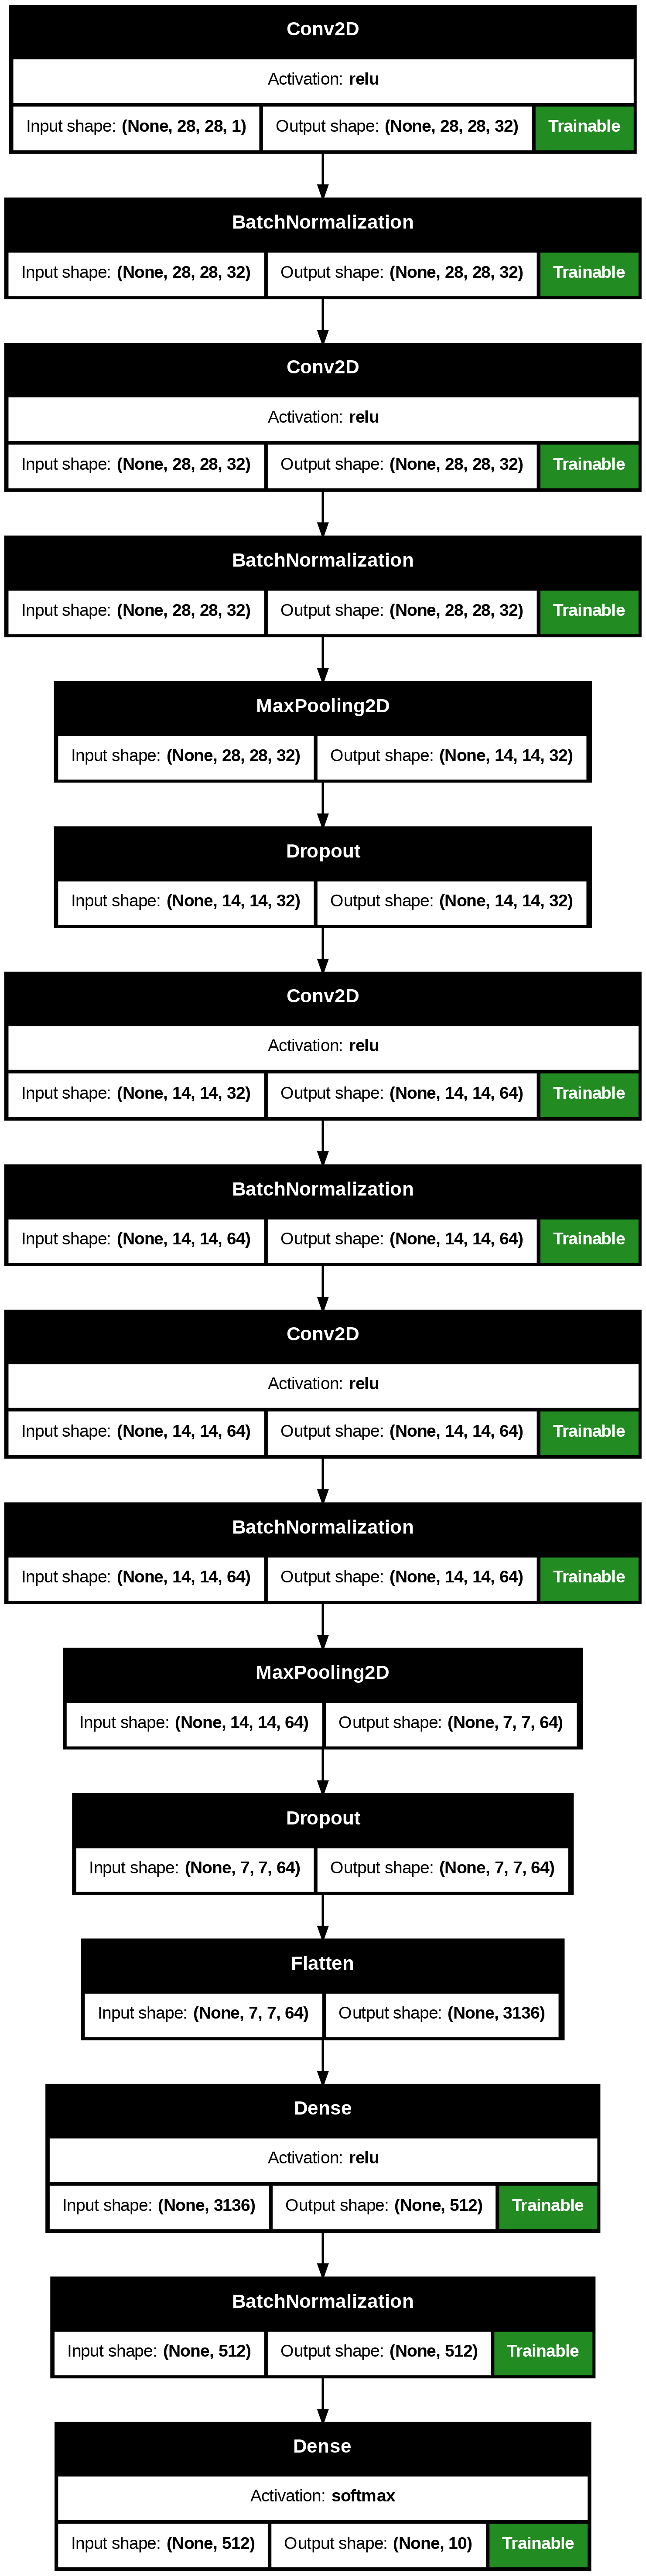

In [14]:
plot_model(model,
           show_shapes=True,
           show_layer_activations=True,
           show_trainable=True,
           )

In [15]:
## Functional API
## 1. 세션 클리어
clear_session()

## 2. 레이어 엮기
# 인풋 레이어
il = Input(shape=(28,28,1))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(32, 3, 1, 'same', activation='relu')(il)
# BatchNormalization
hl = BatchNormalization()(hl)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(32, 3, 1, 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(2)(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(64, 3, 1, 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(64, 3, 1, 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(2)(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Flatten
hl = Flatten()(hl)
# Fully Connected Layer : 노드 512개
hl = Dense(512, activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# 아웃풋 레이어
ol = Dense(10, activation='softmax')(hl)

## 3. 모델의 시작과 끝 지정
model = Model(il, ol)

## 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,679,082 (6.41 MB)

 Trainable params: 1,677,674 (6.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

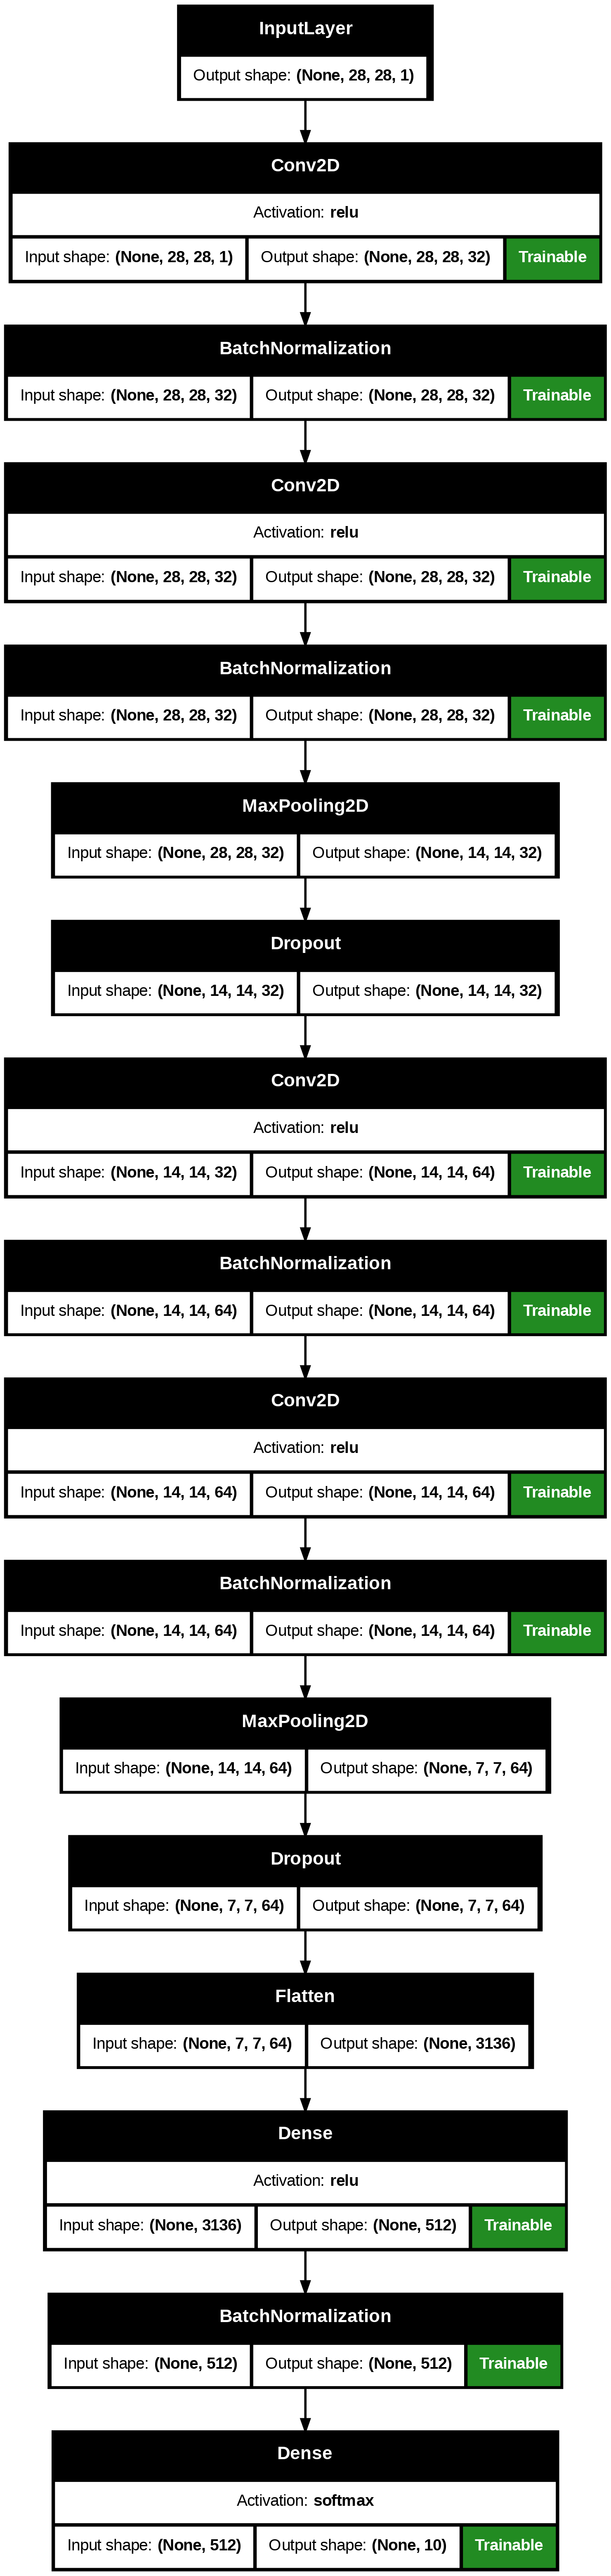

In [16]:
plot_model(model,
           show_shapes=True,
           show_layer_activations=True,
           show_trainable=True,
           )

In [17]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy']
              )

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
      - 2의 배수로 늘려보고 줄여보세요 !
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.


In [18]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5,
                   verbose=1,
                   restore_best_weights=True,
                   )

In [19]:
hist = model.fit(train_x, train_y, validation_split=0.2,
                 epochs=1000, verbose=1,
                 callbacks=[es],
                 )

Epoch 1/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8120 - loss: 0.5545 - val_accuracy: 0.8979 - val_loss: 0.2906
Epoch 2/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8937 - loss: 0.2959 - val_accuracy: 0.9028 - val_loss: 0.2657
Epoch 3/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9106 - loss: 0.2444 - val_accuracy: 0.9133 - val_loss: 0.2443
Epoch 4/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9177 - loss: 0.2252 - val_accuracy: 0.9149 - val_loss: 0.2406
Epoch 5/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9295 - loss: 0.1937 - val_accuracy: 0.9007 - val_loss: 0.2841
Epoch 6/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9353 - loss: 0.1757 - val_accuracy: 0.9319 - val_loss: 0.1878
Epoch 7/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9424 - loss: 0.1565 - val_accuracy: 0.9238 - val_loss: 0.2176
Epoch 8/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9

### 이미지 시각화

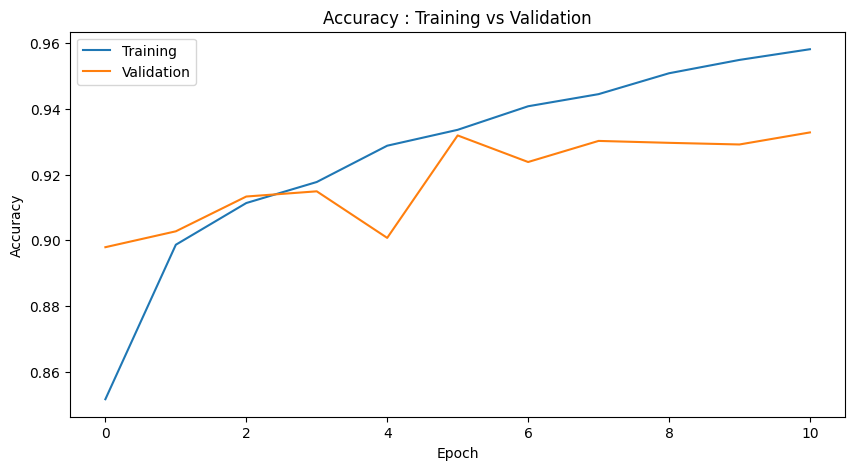

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

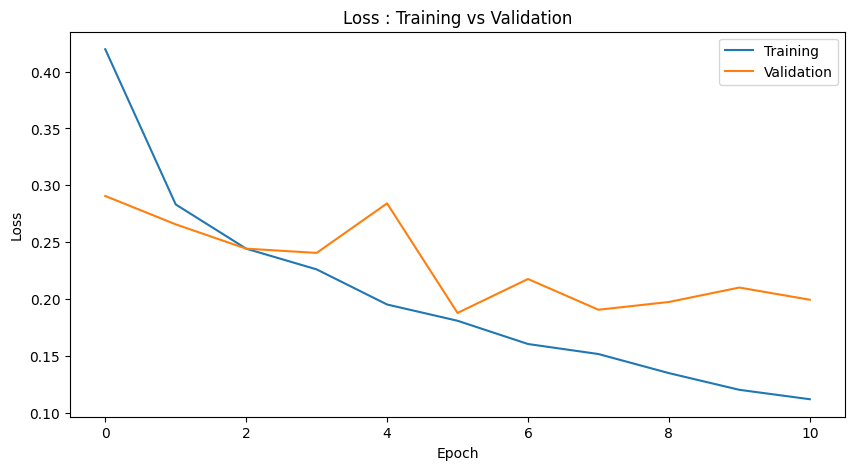

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [22]:
y_pred = model.predict(test_x)
y_pred.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


(10000, 10)

In [23]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [24]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


In [25]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 70.10%


id = 2271
다음 그림은 숫자 Bag 입니다.
모델의 예측 : Bag
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0.   0.   0.   0. 100.   0.]
정답입니다


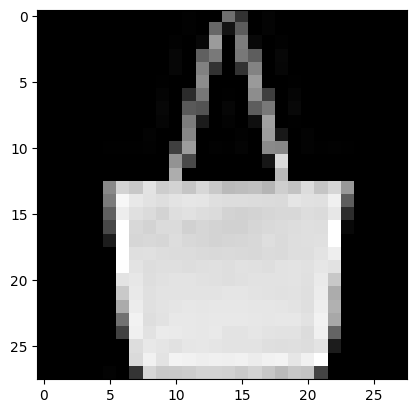

In [26]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {labels[single_test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_y_pred[id]]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

id = 5352
다음 그림은 숫자 Dress 입니다.
모델의 예측 : Shirt
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0. 99.  0.  0.  0.]
틀렸어요


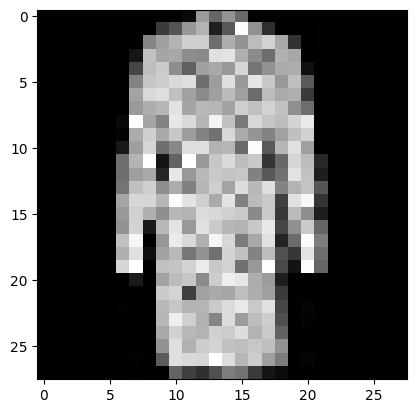

In [27]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {labels[single_test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_y_pred[id]]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()